## UCLA Cross Validation Results Evaluation

In [24]:
import os
import pandas as pd
from lib import analysis_utils as au
import matplotlib.pyplot as plt
import scipy
import numpy as np

### Load the data

In [10]:
pred_dir = "models_preds"
base_name = "UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split"

folds = []

for filename in os.listdir(pred_dir):
    if filename.startswith(base_name):
        print("loading ", filename)
        folds.append(pd.read_csv(os.path.join(pred_dir, filename)))
        
print ("loaded ", len(folds), " folds")

loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-3.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-2.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-1.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-4.csv
loading  UCLA_results_validation_cross_validation_datalen-40720_epochs-100_init_lr-0.01_momentum-0.9_batch_size-32_n_folds-5_n_folds_seed-300_split-0.csv
loaded  5  folds


In [11]:
folds[0]

,imageHASH,name,violence,protest,sign,photo,fire,police,children,group_20,...,pred_sign,pred_photo,pred_fire,pred_police,pred_children,pred_group_20,pred_group_100,pred_flag,pred_night,pred_shouting
0,00a0f070646c4d8d,train-18457.jpg,0.249616,True,1,0,0,0,0,0,...,0.979896,0.030349,0.002532,0.009207,0.027866,0.594562,0.078304,0.049540,0.021279,0.031066
1,261e34606444dbd2,train-23972.jpg,0.403310,True,1,0,0,0,0,1,...,0.995894,0.064207,0.001428,0.011258,0.009056,0.982710,0.791281,0.096251,0.039196,0.094003
2,b2b8bab2872786f6,test-05745.jpg,0.162601,True,1,0,0,0,0,0,...,0.981274,0.028947,0.002566,0.011242,0.032789,0.321497,0.023890,0.013178,0.012668,0.004235
3,91526646166a4849,train-29421.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.035411,0.004224,0.066649,0.996012,0.008979,0.616857,0.096533,0.048271,0.007075,0.105828
4,4624ac2f33739317,test-04716.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.725791,0.028243,0.001875,0.021008,0.018083,0.614980,0.090676,0.015889,0.018591,0.010007
5,d77099f96a5afa7f,train-29440.jpg,0.350599,True,1,0,0,0,0,1,...,0.996721,0.036896,0.001182,0.010896,0.012707,0.716545,0.083313,0.016309,0.023467,0.020258
6,ece4e8f9e8685ad2,train-16528.jpg,0.310638,True,1,0,0,0,0,0,...,0.990916,0.038306,0.000540,0.004168,0.013098,0.840432,0.204127,0.215518,0.001354,0.135533
7,c3e1c0e3dcf8f8c2,test-02509.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.603546,0.020535,0.045992,0.090726,0.003852,0.938865,0.730549,0.110583,0.538810,0.019436
8,97dcd2cab7c6ea22,train-27788.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.919655,0.140582,0.003458,0.009854,0.011750,0.884335,0.242613,0.052464,0.013498,0.011670
9,5155711111331357,test-06406.jpg,-1.000000,False,-1,-1,-1,-1,-1,-1,...,0.905929,0.087583,0.002229,0.008131,0.017760,0.427538,0.091049,0.017387,0.045376,0.028243


### Protest

printing fold  0


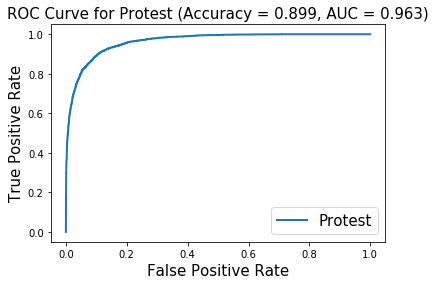

printing fold  1


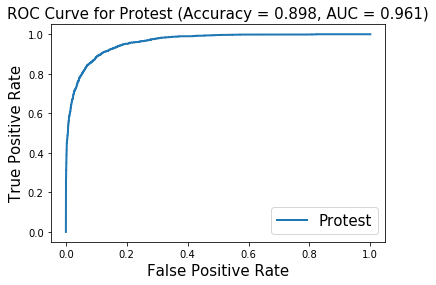

printing fold  2


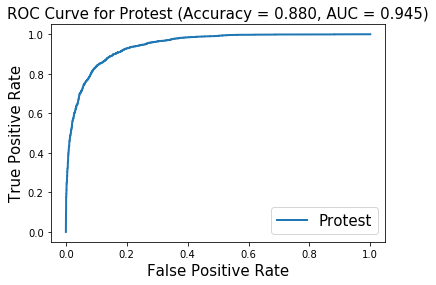

printing fold  3


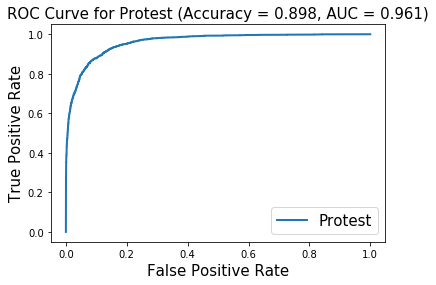

printing fold  4


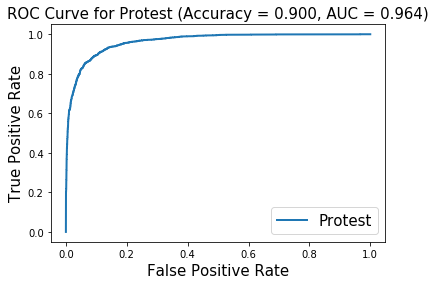

In [13]:
for indx, fold in enumerate(folds):
    print("printing fold " , indx)
    au.plotROC("protest", fold["protest"], fold["pred_protest"])

### Violence

the rsquare measure has a mean of  0.7844988791194556  and standard deviation of  0.018315575461032834
the correlation measure has a mean of  0.885658429818222  and standard deviation of  0.010393498514806986


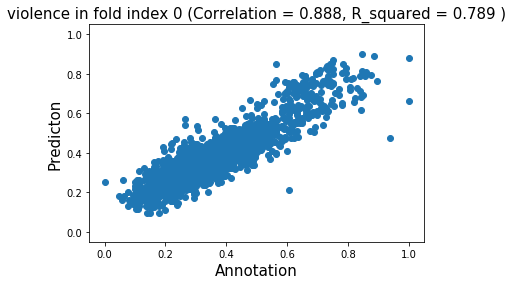

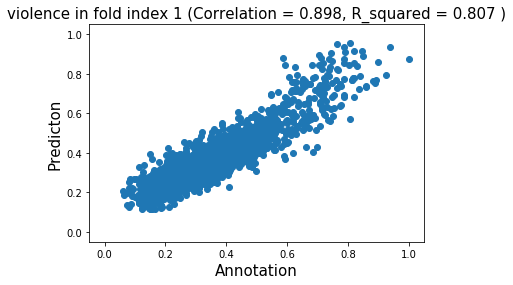

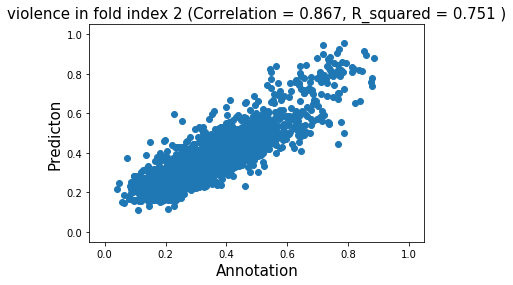

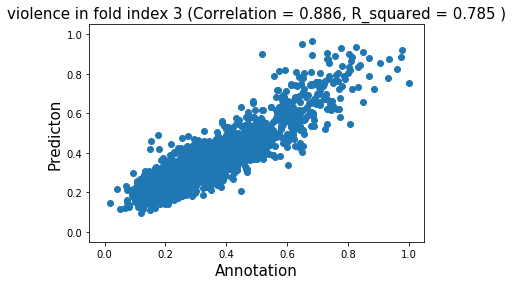

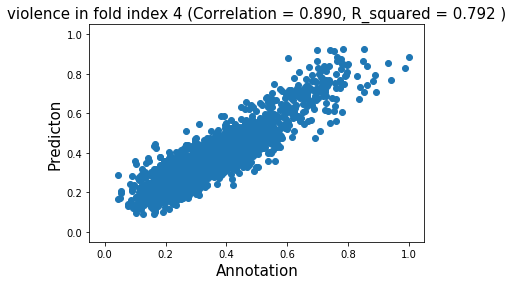

In [34]:
r_squared_all_folds = []
corr_all_folds = []

for indx, fold in enumerate(folds):
    # remove masked values from test set
    non_masked_violence_true = fold[fold["violence"] != - 1]["violence"]
    non_masked_violence_preds = fold[fold["violence"] != - 1]["pred_violence"]
    
    fig, ax = plt.subplots()
    plt.scatter(non_masked_violence_true, non_masked_violence_preds, label = "violence")
    plt.xlim([-.05,1.05])
    plt.ylim([-.05,1.05])
    plt.xlabel('Annotation', fontsize = 15)
    plt.ylabel('Predicton', fontsize = 15)
    corr, pval = scipy.stats.pearsonr(non_masked_violence_true, non_masked_violence_preds)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(non_masked_violence_true,non_masked_violence_preds)
    r_squared = r_value ** 2
    r_squared_all_folds.append(r_squared)
    corr_all_folds.append(corr)
    plt.title(('{attr} in fold index {fold} (Correlation = {corr:.3f}, R_squared = {r_2:.3f} )'
                .format(attr = "violence", corr= corr, r_2 = r_squared, fold = indx  )), fontsize = 15)
    
std_rsquare = np.std(np.array(r_squared_all_folds))
mean_rsquare = np.mean(np.array(r_squared_all_folds))

std_corr = np.std(np.array(corr_all_folds))
mean_corr = np.mean(np.array(corr_all_folds))

print("the rsquare measure has a mean of ", mean_rsquare, " and standard deviation of ", std_rsquare)
print("the correlation measure has a mean of ", mean_corr, " and standard deviation of ", std_corr)